In [11]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_openai import ChatOpenAI
from typing import TypedDict, Annotated
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
# Define the state of the chatbot

class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [4]:
# Defin the LLM for the chatbot
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.0
)

In [5]:
# Define the chat_node function

def chat_node(state: ChatState):
    """A simple chat node that interacts with the user."""
    # Take the user query from the state
    messages = state['messages']
    
    # Send the user query to the LLM
    response = llm.invoke(messages)
    
    # Add the response to the state
    return {'messages': [response]}

In [12]:
# Define checkpointer for the graph
checkpointer = MemorySaver()

# Define the graph for the chatbot

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# Compile the graph
chatbot = graph.compile(checkpointer=checkpointer)

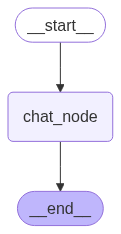

In [13]:
chatbot

In [8]:
# Define the initial state of the chatbot
initial_state = {
    'messages': [HumanMessage(content="What is the capital of India")]
}

# run the chatbot with the initial state
response = chatbot.invoke(initial_state)

# Print the response
print(response)

{'messages': [HumanMessage(content='What is the capital of India', additional_kwargs={}, response_metadata={}, id='77a9dc6c-0974-4311-b1dd-1df6899158b6'), AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 13, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-ByLIEHPxNzbEBWj7BiLpUzKiWMSgm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6b0f512b-8ffe-4b34-a4b0-d995d8f0fafc-0', usage_metadata={'input_tokens': 13, 'output_tokens': 8, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}


In [9]:
# extract the content of the AI Message in the response
response['messages'][-1].content

'The capital of India is New Delhi.'

In [14]:
# Loop to keep the chatbot running

thread_id = 1

while True:
    user_message = input('Type your message: ')
    
    print("User message:", user_message)
    
    if user_message.strip().lower() in ['exit', 'quit', 'stop', 'bye']:
        break
    
    config = {'configurable': {'thread_id': thread_id}}

    # Invoke the chatbot with the user message
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)

    # Print the response
    print("Chatbot response:", response['messages'][-1].content)

User message: Hi, my name is Shreyas
Chatbot response: Hi Shreyas! How can I assist you today?
User message: What is my name?
Chatbot response: Your name is Shreyas. How can I help you today?
User message: exit


In [15]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi, my name is Shreyas', additional_kwargs={}, response_metadata={}, id='0146e85a-dd2b-4f47-8a71-47cdc7d577a5'), AIMessage(content='Hi Shreyas! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 15, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-ByLWFD60J45iCip37yXwEkohdwJmZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3399b524-3a6f-44f7-b35b-5d93f4241f7b-0', usage_metadata={'input_tokens': 15, 'output_tokens': 12, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasonin